In [15]:
import pycuber as pc
import numpy as np
# from PyCuber.pycuber.cube.cube_array import CubeArray
# from PyCuber.pycuber.cube.cubie_cube import CubieCube
# from PyCuber.pycuber import cube

#### save video

In [16]:
from env import make_env

In [17]:
import torch

In [18]:
import matplotlib.pyplot as plt

In [22]:
import matplotlib.animation as animation

In [61]:
env = make_env('cube-v0', 2)

<Figure size 800x800 with 0 Axes>

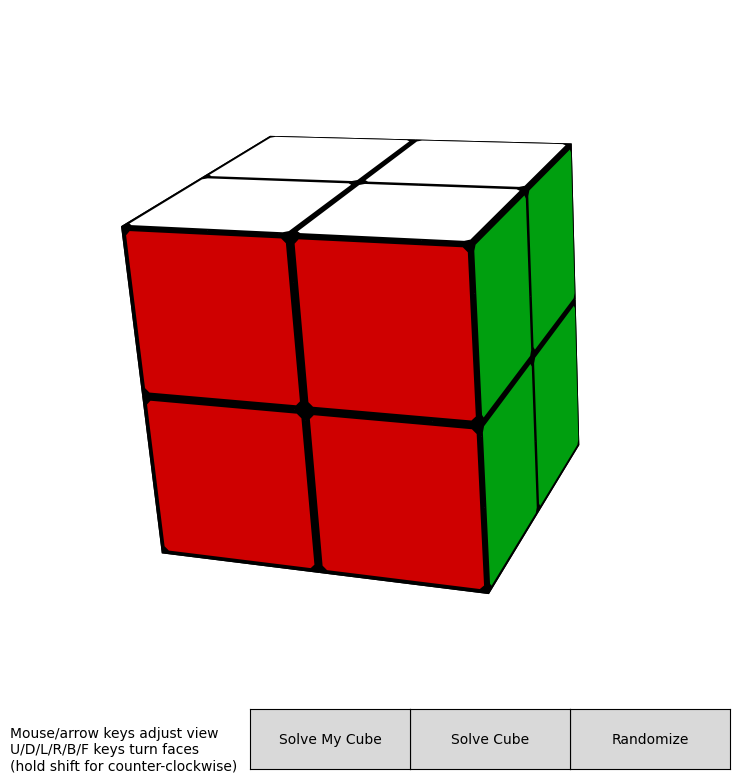

In [62]:
env.fig

In [63]:
env.fig.axes

[<Axes:>, <Axes:>, <Axes:>, <InteractiveCube:>]

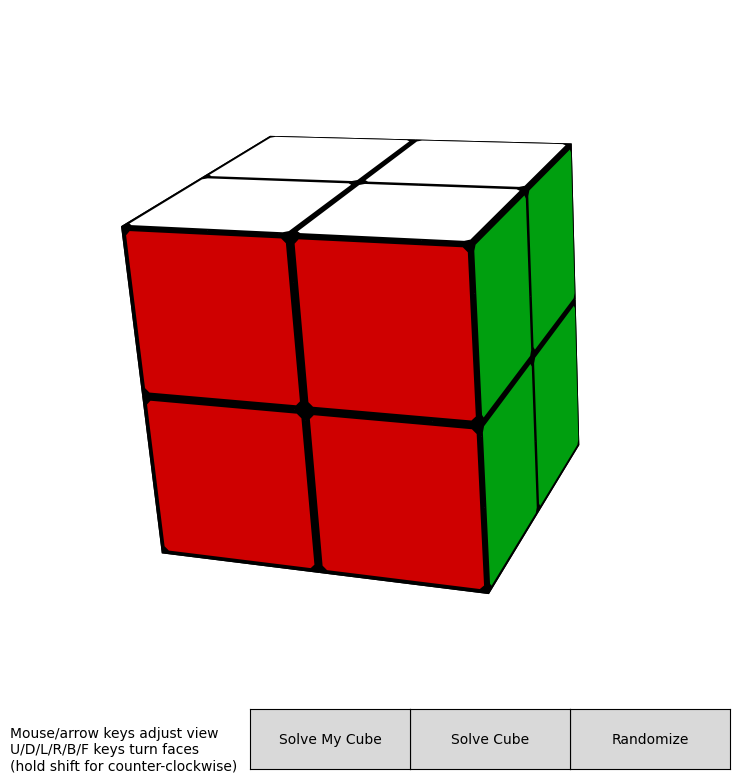

In [64]:
env.fig.axes[3].figure

In [65]:
type(env.fig.axes[3].figure)

matplotlib.figure.Figure

In [51]:
env.fig.axes[3].figure.canvas.draw

<bound method FigureCanvasAgg.draw of <matplotlib.backends.backend_agg.FigureCanvasAgg object at 0x7f9a45ecc090>>

In [52]:
def fig_to_array(fig):
    fig.canvas.draw
    return np.array(fig.canvas.renderer._renderer)

In [53]:
array_img = np.array(env.fig.canvas.renderer._renderer)

In [54]:
env.fig.axes[3].frames

[]

In [55]:
def save_video_(frames, cube_size, scramble_count, sample_cube_count, video_path):
    filename = f'cube{cube_size}_scramble{scramble_count}_sample{sample_cube_count}.gif'
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=0)
    anim.save(video_path + '/'+ filename, writer='imagemagick', fps=5)

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

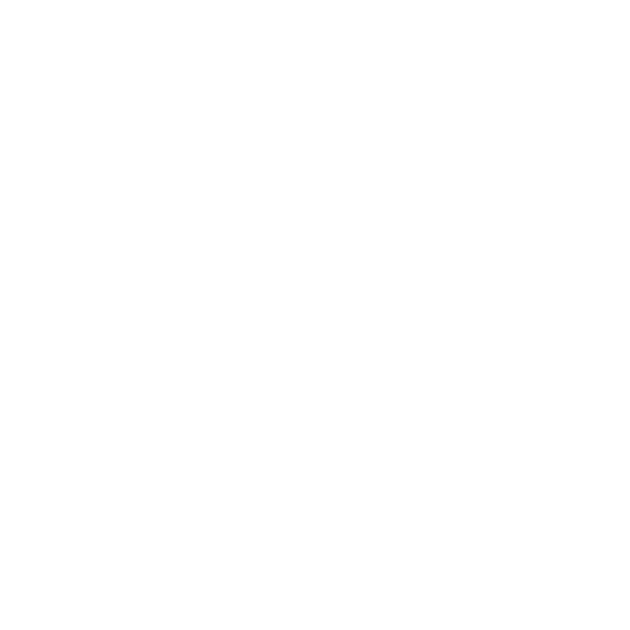

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

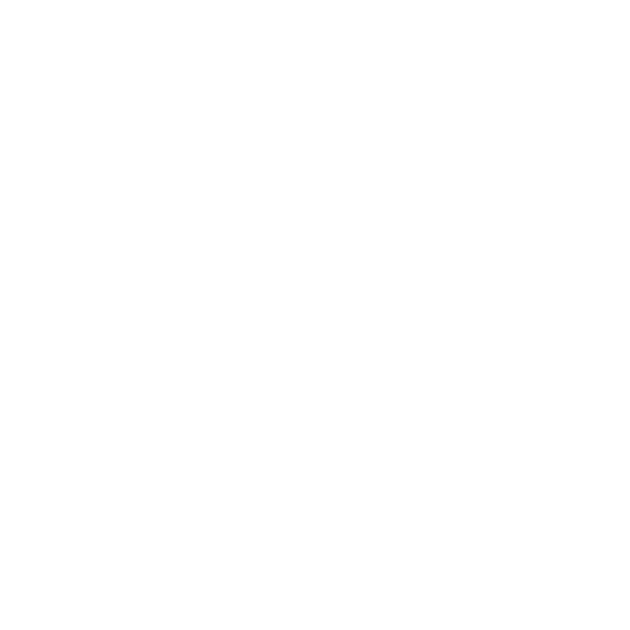

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

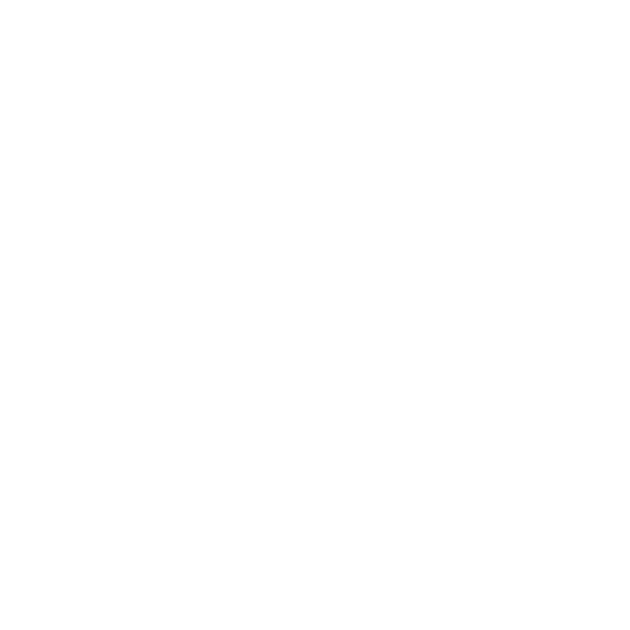

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

KeyboardInterrupt: 

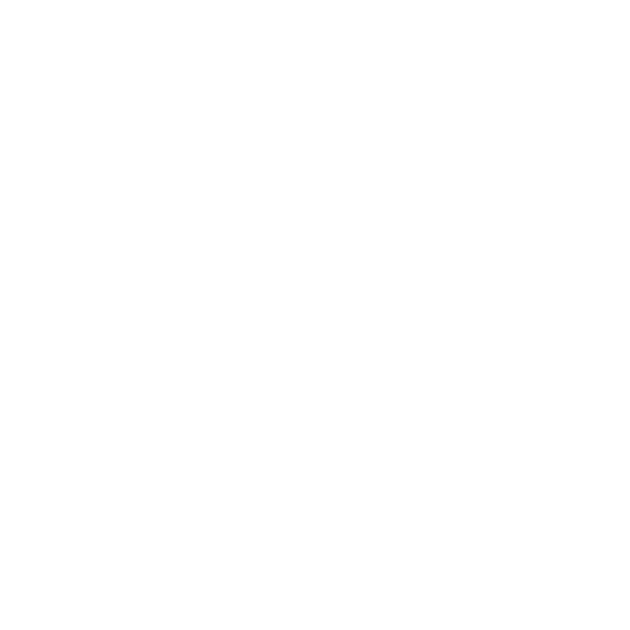

In [56]:
max_timesteps = 10
sample_scramble_count = 3
sample_cube_count = 5
seed = [i*10 for i in range(sample_cube_count)]
for scramble_count in range(1, sample_scramble_count+1):
    frames = []
    solve_count = 0
    for idx in range(1, sample_cube_count+1):
        if idx == sample_cube_count and scramble_count==sample_scramble_count: 
            # env.render()
            pass
        state, done = env.reset(seed[idx-1], scramble_count), False
        for timestep in range(1, max_timesteps+1):
            # save video
            env.render() # env render를 하면 draw interactive 의 frame에 data가 append 된다
            # frames.append(fig_to_array(env.fig.axes[3].figure))
            with torch.no_grad():
                # state_tensor = torch.tensor(state).float().to(device).detach()
                # action = model.get_action(state_tensor)
                actions = np.random.randint(6, size=scramble_count)
            for action in actions:
                next_state, reward, done, info = env.step(action)
                # frames.append(fig_to_array(env.fig.axes[3].figure))
                # step 함수 내에 draw interactive의 rotate face를 하고 이 안에 draw cube가 포함되어 있다
                # 따라서 계속해서 data가 쌓인다
            if done:
                solve_count += 1
                break
            state = next_state
        env.save_video(cube_size = env.cube_size, scramble_count = scramble_count, sample_cube_count = sample_cube_count, video_path = './video')
        # save_video_(frames, cube_size=env.cube_size, scramble_count = scramble_count, sample_cube_count = sample_cube_count, video_path= './video')
        if idx == sample_cube_count and scramble_count==sample_scramble_count: # 마지막 state render종료
            # env.close_render()
            pass

### cubie array analysis

In [ ]:
U, L, F, R, B, D = range(6)

X, Y, Z = range(3)

In [ ]:
ROT = np.zeros((3, 6, 6), int)

In [ ]:
rotation_patterns = np.array([
    [[F, U], [U, B], [B, D], [D, F], [L, L], [R, R]],
    [[L, B], [B, R], [R, F], [F, L], [U, U], [D, D]],
    [[L, U], [U, R], [R, D], [D, L], [F, F], [B, B]],
])

In [ ]:
print(ROT)

In [ ]:
rotation_patterns[0]
# U 0
# L 1
# F 2
# R 3
# B 4
# D 5

In [ ]:
rotation_patterns[0][:, 0]

In [ ]:
ROT[0][rotation_patterns[0][:, 0], rotation_patterns[0][:, 1]] = 1

In [ ]:
ROT[0]

In [ ]:
ca = CubeArray()

In [ ]:
ca.shape

In [ ]:
ca.get_face(face=U)

In [ ]:
ca.twist(X, 0)

In [ ]:
c = pc.Cube()
print(c)

In [ ]:
c

In [ ]:
c["U"]

In [ ]:
c['UB']

In [ ]:
c['UFL']

In [ ]:
c.perform_step("U")

In [ ]:
c.children

In [ ]:
print(type(c.children))

In [ ]:
c['U']

In [ ]:
c.get_face("U")

In [ ]:
c.at_face("U")

In [ ]:
c.at_face("D")

In [ ]:
u_list = []
for e in c.at_face("U"):
    if e.type == 'corner':
        u_list.append(e)
        print(e.location)

In [ ]:
cc = u_list[0]

In [ ]:
cc.facings

In [ ]:
ccc = u_list[1]

In [ ]:
ccc.facings

In [ ]:
cc == ccc

In [ ]:
cc.facings['U'].colour

In [ ]:
for idx, key in enumerate(ccc.facings.keys()):
    item = ccc.facings[key]
    if item == cc.facings['U']:
        print(idx)

In [ ]:
print(cc.facings['U'])

In [ ]:
cc.type

In [ ]:
cc.location

In [ ]:
cc.facings[cc.location[1]]

In [ ]:
cc.parent

In [ ]:
cc.children

In [ ]:
corner_list = []
edge_list = []
for cc in c.children:
    type = cc.type
    location = cc.location
    if type == 'corner':
        corner_list.append(cc)
    elif type == 'edge':
        edge_list.append(cc)
    else:
        pass

In [ ]:
corner_list

In [ ]:
edge_list

In [ ]:
corner_location_list = ["LDB", "LDF", "LUB", "LUF", "RDB", "RDF", "RUB", "RUF"]
edge_location_list = ["LB", "LF", "LU", "LD", "DB", "DF", "UB", "UF", "RB", "RF", "RU", "RD"]

In [ ]:
len(edge_list[0].facings)

In [ ]:
len(corner_list[0].facings)

In [ ]:
child = corner_list[0]

In [ ]:
child.location[0]

In [ ]:
square_set = child.children
len(square_set)

In [ ]:
e = next(iter(square_set))

In [ ]:
e

#### 학습할 때만 sim state -> state로 변환하여 사용 
#### 학습 이후 visualize를 할 때는 interactive cube를 사용하여 action만 구현
#### 결국 sim state를 state로 변환만 하면 된다
#### interactive cube는 고칠 것이 없다

In [ ]:
corner_location_list.index(corner_list[0].location)

In [ ]:
def sim_state_to_state(state_dim, cube_size, sim_cube):
    '''
        state = np.zeros(state_dim)
        8 x 24 + 12 x 24
        8칸 색상 3개 -> 기준면을 잡고 24개의 색이 들어갈 공간 -> one hot coding
        엣지도 그런 식으로
        corner의 경우 24개의 기준 면이 들어갈 공간이 있다
        이 공간에 위치한 경우를 1 아닌 경우를 0이라 한다

         기준 면: 8 종류
        각 기준 면에 대해 24개의 경우의 수 존재
        기준 면의 현재 위치를 받아서 0 ~ 23을 출력하는 함수
        기준 면의 현재 위치를 표현해야 함
        코너의 색 조합은 유일하기 때문에 색 조합이 들어있는 코너의 위치를 찾고
        그 위치에서 기준 면의 방향에 따라 0, 1, 2 반환
        비교를 하기 위해서는 색을 사용해야 한다
        xyz 중에서 기준면의 색상이 어디에 위치해있는지

        corner - U, D
        edge - U, D F, B
    
    '''
    if cube_size == 3:
        corner_location_list = ["LDB", "LDF", "LUB", "LUF", "RDB", "RDF", "RUB", "RUF"] # Y Z X
        edge_location_list = ["LB", "LF", "LU", "LD", "DB", "DF", "UB", "UF", "RB", "RF", "RU", "RD"] # Y X, Z X, 
        corner_state = np.zeros([8, 24])
        edge_state = np.zeros([12, 24])

        corner_list = []
        edge_list = []

        u_list = sim_cube.at_face("U") 
        d_list = sim_cube.at_face("D")
        f_list = sim_cube.at_face("F")
        b_list = sim_cube.at_face("B")

        for u in u_list:
            if u.type == 'corner':
                corner_list.append(u)
            elif u.type == 'edge':
                edge_list.append(u)
        for d in d_list:
            if d.type == 'corner':
                corner_list.append(d)
            elif d.type == 'edge':
                edge_list.append(d)

        # 2개만 추출   
        for f in f_list:
            if f.type == 'edge':
                if f.location == 'LF' or f.location == 'RF':
                    edge_list.append(f)
        for b in b_list:
            if b.type == 'edge':
                if b.location == 'LB' or b.location == 'RB':
                    edge_list.append(b)

        # 색 조합으로 위치 찾기
        corner_color_dict = {}
        for corner in corner_list:
            corner_color_dict[corner.location] = [corner.facings, corner.facings[corner.location[1]]] # U, D
        
        edge_color_dict = {}
        for edge in edge_list:
            if edge.location[0] == 'L':
                edge_color_dict[edge.location] = [edge.facings, edge.facings[edge.location[1]]] # LU, LD. LF, LB 
            elif edge.location[0] == 'R':
                edge_color_dict[edge.location] = [edge.facings,edge.facings[edge.location[1]]] # RU, RD. RF. RB
            elif edge.location[0] == 'U':
                edge_color_dict[edge.location] = [edge.facings,edge.facings[edge.location[0]]] # UB, UF
            elif edge.location[0] == 'D':
                edge_color_dict[edge.location] = [edge.facings,edge.facings[edge.location[0]]] # DB, DF
            else:
                pass

        # corner의 색 조합은 유일 -> 같은 색 조합을 갖는 corner를 찾고 X Y Z 에 따라 3가지 경우의 수가 존재함을 이용
        base_cube = pc.Cube()
        for key in corner_color_dict.keys():
            facings, target_face = corner_color_dict[key][0], corner_color_dict[key][1]
            facings_set = set()
            for face_key in facings.keys():
                facings_set.add(facings[face_key])

            for position, corner_location in enumerate(corner_location_list):
                base_color_map = base_cube[corner_location].facings
                base_set = set()
                for base_key in base_color_map.keys():
                    base_set.add(base_color_map[base_key])
                if facings_set == base_set:
                    for position_idx, base_key in enumerate(base_color_map):
                        base_color = base_color_map[base_key]
                        if target_face == base_color:
                            state_position = position * 3 + position_idx
                            corner_state[position][state_position] = 1.0

        for key in edge_color_dict.keys():
            facings, target_face = edge_color_dict[key][0], edge_color_dict[key][1]
            facings_set = set()
            for face_key in facings.keys():
                facings_set.add(facings[face_key])
            for position, edge_location in enumerate(edge_location_list):
                base_color_map = base_cube[edge_location].facings
                base_set = set()
                for base_key in base_color_map.keys():
                    base_set.add(base_color_map[base_key])
                if facings_set == base_set:
                    for position_idx, base_key in enumerate(base_color_map):
                        base_color = base_color_map[base_key]
                        if target_face == base_color:
                            state_position = position * 2 + position_idx
                            edge_state[position][state_position] = 1.0
        
        state = np.concatenate([corner_state, edge_state])
    return state, corner_state, edge_state


In [ ]:
sim_cube = pc.Cube()
state_dim, action_dim = [20, 24], 12
cube, corner, edge = sim_state_to_state(state_dim, 3, sim_cube)

In [ ]:
cube

In [ ]:
cube.shape

In [ ]:
another_sim_cube = pc.Cube()
another_sim_cube.perform_step('R')
another_cube, another_corner, another_edge = sim_state_to_state(state_dim, 3, another_sim_cube)

In [ ]:
another_cube

In [ ]:
np.where(another_cube == 1.0)

In [ ]:
np.where(cube == 1.0)

## Step

In [ ]:
action_to_sim_action = {\
            2:["U","U'","F","F'","R","R'"],
            3:["U","U'","F","F'","R","R'","D","D'","B","B'","L","L'"],\
            'render': [["U",1],["U",-1],["F",1],["F",-1],["R",1],["R",-1],["D",1],["D",-1],["B",1],["B",-1],["L",1],["L",-1]]
        }